In [2]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)


In [3]:
print(x_train[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


The label is: [6]


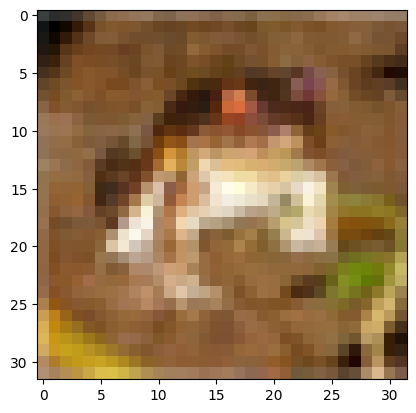

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
img = plt.imshow(x_train[0])
print('The label is:', y_train[0])

The label is: [9]


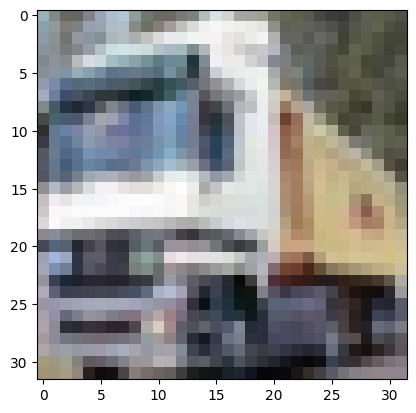

In [6]:
img = plt.imshow(x_train[1])
print('The label is:', y_train[1])

we convert the label into a set of 10 numbers where each number represents if the image belongs to that class or not. So if an image belongs to the first class, the first number of this set will be a 1 and all other numbers in this set will be a 0. This is called a one-hot encoding

In [7]:
import keras
y_train_one_hot = keras.utils.to_categorical(y_train, 10)
y_test_one_hot = keras.utils.to_categorical(y_test, 10)

In [8]:
print('The one hot label is:', y_train_one_hot[1])

The one hot label is: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [9]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255
x_test = x_test / 255

In [10]:
x_train[0]

array([[[0.23137255, 0.24313726, 0.24705882],
        [0.16862746, 0.18039216, 0.1764706 ],
        [0.19607843, 0.1882353 , 0.16862746],
        ...,
        [0.61960787, 0.5176471 , 0.42352942],
        [0.59607846, 0.49019608, 0.4       ],
        [0.5803922 , 0.4862745 , 0.40392157]],

       [[0.0627451 , 0.07843138, 0.07843138],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509805, 0.21568628],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117648, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215687, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941177, 0.19607843],
        [0.47058824, 0.32941177, 0.19607843],
        [0.42745098, 0.28627452, 0.16470589]],

       ...,

       [[0.8156863 , 0.6666667 , 0.3764706 ],
        [0.7882353 , 0.6       , 0.13333334],
        [0.7764706 , 0

    Changed the label to one-hot encodings
    Scale the image pixel values to take between 0 and 1

Building and Training 

In [11]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [12]:
model = Sequential()

In [13]:
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32,32,3)))

In [14]:
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))

In [15]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [16]:
model.add(Dropout(0.25))

In [17]:
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

In [18]:
model.add(Flatten())

To make this cube-like format of neurons into one row, we have to first flatten it. We do so by adding a Flatten layer:

In [19]:
model.add(Dense(512, activation='relu'))

In [20]:
model.add(Dropout(0.5))

In [21]:
model.add(Dense(10, activation='softmax'))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                        

The loss function we use is called categorical cross entropy, which is applicable for a classification problem of many classes. The optimizer we use here is Adam. We haven’t gone through the intuition of Adam yet, but know that Adam is simply a type of stochastic gradient descent (with a few modifications) so that it trains better. Lastly, we want to track the accuracy of our model.

In [23]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [24]:
hist = model.fit(x_train, y_train_one_hot, 
           batch_size=32, epochs=20, 
           validation_split=0.2)

Epoch 1/20
1250/1250 [==============================] - 155s 122ms/step - loss: 1.5619 - accuracy: 0.4288 - val_loss: 1.1933 - val_accuracy: 0.5767
Epoch 2/20
1250/1250 [==============================] - 149s 119ms/step - loss: 1.1765 - accuracy: 0.5831 - val_loss: 1.0646 - val_accuracy: 0.6227
Epoch 3/20
1250/1250 [==============================] - 148s 119ms/step - loss: 1.0039 - accuracy: 0.6471 - val_loss: 0.8783 - val_accuracy: 0.6929
Epoch 4/20
1250/1250 [==============================] - 149s 119ms/step - loss: 0.9000 - accuracy: 0.6816 - val_loss: 0.8498 - val_accuracy: 0.7005
Epoch 5/20
1250/1250 [==============================] - 150s 120ms/step - loss: 0.8318 - accuracy: 0.7064 - val_loss: 0.7923 - val_accuracy: 0.7244
Epoch 6/20
1250/1250 [==============================] - 153s 122ms/step - loss: 0.7689 - accuracy: 0.7283 - val_loss: 0.7451 - val_accuracy: 0.7436
Epoch 7/20
1250/1250 [==============================] - 149s 119ms/step - loss: 0.7248 - accuracy: 0.7454 - val_

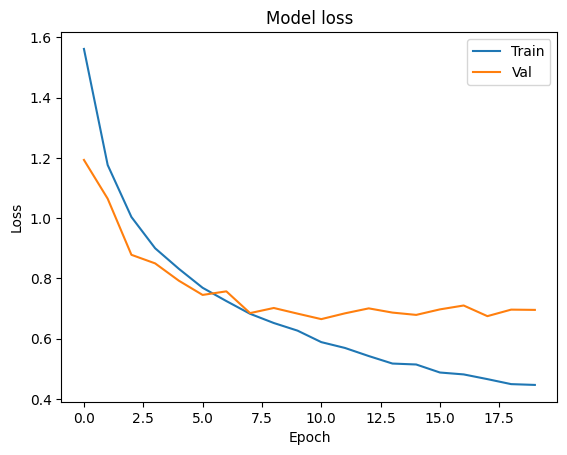

In [25]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

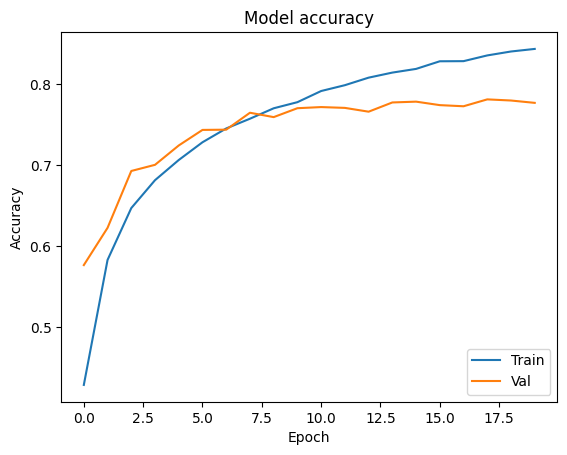

In [26]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [27]:
model.evaluate(x_test, y_test_one_hot)[1]

313/313 [==============================] - 6s 21ms/step - loss: 0.7235 - accuracy: 0.7731


0.7731000185012817

In [28]:
#to save model
model.save('my_cifar10_model.h5')
#to load saved model
from keras.models import load_model
model = load_model('my_cifar10_model.h5')

In [29]:
my_image = plt.imread("cat.jpg")

In [31]:
from skimage.transform import resize
my_image_resized = resize(my_image, (32,32,3))

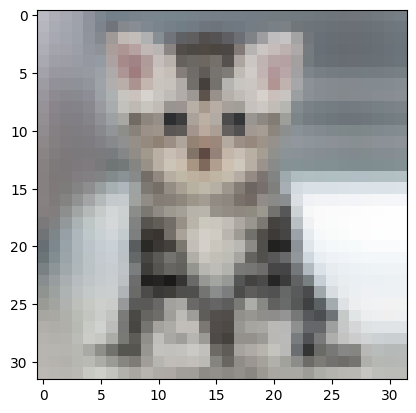

In [32]:
img = plt.imshow(my_image_resized)

In [33]:
import numpy as np
probabilities = model.predict(np.array( [my_image_resized,] ))

1/1 [==============================] - 1s 856ms/step


In [34]:
probabilities

array([[0.01398116, 0.00060195, 0.02130289, 0.34030896, 0.16422443,
        0.35224277, 0.00507777, 0.08904084, 0.01265221, 0.00056697]],
      dtype=float32)

In [35]:
number_to_class = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
index = np.argsort(probabilities[0,:])
print("Most likely class:", number_to_class[index[9]], "-- Probability:", probabilities[0,index[9]])
print("Second most likely class:", number_to_class[index[8]], "-- Probability:", probabilities[0,index[8]])
print("Third most likely class:", number_to_class[index[7]], "-- Probability:", probabilities[0,index[7]])
print("Fourth most likely class:", number_to_class[index[6]], "-- Probability:", probabilities[0,index[6]])
print("Fifth most likely class:", number_to_class[index[5]], "-- Probability:", probabilities[0,index[5]])

Most likely class: dog -- Probability: 0.35224277
Second most likely class: cat -- Probability: 0.34030896
Third most likely class: deer -- Probability: 0.16422443
Fourth most likely class: horse -- Probability: 0.08904084
Fifth most likely class: bird -- Probability: 0.02130289
